# EDA - NoMES


In [1]:
import pandas as pd

changes = pd.read_csv("../Downloads/data_2020.csv",  sep=';')
print(changes['time'])


0           2020/08/02 23:40:03
1           2020/08/02 23:40:03
2           2020/08/02 23:40:03
3           2020/08/02 23:40:03
4           2020/08/02 23:40:03
                   ...         
30371548    2020/08/02 23:40:03
30371549    2020/08/02 23:40:03
30371550    2020/08/02 23:40:03
30371551    2020/08/02 23:40:03
30371552    2020/08/02 23:40:03
Name: time, Length: 30371553, dtype: object


In [2]:
changes = changes[(changes['month'] >= 4)  & (changes['yhour'] <= 3170)]
weather = pd.read_csv("./weather2020.csv", parse_dates= {"time" : ["Vuosi","Kk","Pv", "Klo"]})
weather
#weather['datetime'] = weather[['Vuosi', 'Kk', 'Pv', 'Klo']].apply(pd.to_datetime, format='%Y-%m-%d %HH:%MM')

,time,Aikavyöhyke,Pilvien määrä (1/8),Ilmanpaine (msl) (hPa),Sademäärä (mm),Suhteellinen kosteus (%),Sateen intensiteetti (mm/h),Lumensyvyys (cm),Ilman lämpötila (degC),Kastepistelämpötila (degC),Näkyvyys (m),Tuulen suunta (deg),Puuskanopeus (m/s),Tuulen nopeus (m/s)
0,2020-04-01 00:00:00,UTC,1.0,999.9,0.0,79.0,0.0,0.0,3.1,-0.2,50000.0,277.0,6.2,3.7
1,2020-04-01 00:10:00,UTC,1.0,999.8,NaN,79.0,0.0,0.0,3.1,-0.2,50000.0,275.0,4.7,2.9
2,2020-04-01 00:20:00,UTC,1.0,999.5,NaN,78.0,0.0,0.0,3.0,-0.4,45290.0,264.0,6.7,3.7
3,2020-04-01 00:30:00,UTC,1.0,999.4,NaN,77.0,0.0,0.0,3.1,-0.5,50000.0,278.0,6.7,3.8
4,2020-04-01 00:40:00,UTC,1.0,999.3,NaN,76.0,0.0,0.0,3.1,-0.7,50000.0,278.0,7.0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,2020-06-23 23:20:00,UTC,0.0,1022.6,NaN,69.0,0.0,-1.0,17.5,11.8,50000.0,323.0,3.7,2.5
12093,2020-06-23 23:30:00,UTC,0.0,1022.6,NaN,69.0,0.0,-1.0,17.3,11.5,50000.0,316.0,3.6,2.5
12094,2020-06-23 23:40:00,UTC,0.0,1022.7,NaN,69.0,0.0,-1.0,17.2,11.4,50000.0,321.0,3.5,2.5
12095,2020-06-23 23:50:00,UTC,0.0,1022.8,NaN,69.0,0.0,-1.0,17.1,11.4,50000.0,321.0,3.4,2.3


In [3]:
changes['time'] = pd.to_datetime(changes['time'])
weather['time'] = pd.to_datetime(weather['time'].dt.strftime('%Y-%m-%d %H:%M'))
changes['time'] = changes['time'].dt.strftime('%Y-%m-%d %H:%M')
changes['time'] = pd.to_datetime(changes['time'])


In [4]:
print(weather['time'])
print(changes['time'])


0       2020-04-01 00:00:00
1       2020-04-01 00:10:00
2       2020-04-01 00:20:00
3       2020-04-01 00:30:00
4       2020-04-01 00:40:00
                ...        
12092   2020-06-23 23:20:00
12093   2020-06-23 23:30:00
12094   2020-06-23 23:40:00
12095   2020-06-23 23:50:00
12096   2020-06-24 00:00:00
Name: time, Length: 12097, dtype: datetime64[ns]
15593701   2020-03-31 21:00:00
15593702   2020-03-31 21:00:00
15593703   2020-03-31 21:00:00
15593704   2020-03-31 21:00:00
15593705   2020-03-31 21:00:00
                   ...        
30243586   2020-08-01 23:55:00
30243587   2020-08-01 23:55:00
30243588   2020-08-01 23:55:00
30243589   2020-08-01 23:55:00
30243590   2020-08-01 23:55:00
Name: time, Length: 14649890, dtype: datetime64[ns]


KeyError: 'clocktime'

In [5]:
changes = pd.merge(changes, weather, how='outer', on='time')

In [6]:
print(changes)
# check for missing values (month, days per month)
# lists months and days per month

# expected values = something


def check_missing_values():

    months = changes['month'].unique()

    for m in months:
        print(m)
        month = changes[changes['month'] == m]
        
        print(month['day'].unique())
        
        # compare to expected values
    # return difference


maxspaces = max(changes["bikesAvailable"])

print(changes[changes["bikesAvailable"] == maxspaces])

check_missing_values()

              id  bikesAvailable  spacesAvailable  allowDropoff  \
0         1215.0             0.0             10.0           1.0   
1         1213.0             6.0              4.0           1.0   
2         1211.0            10.0              0.0           1.0   
3         1219.0             0.0             10.0           1.0   
4         1217.0            18.0              2.0           1.0   
...          ...             ...              ...           ...   
14651352     NaN             NaN              NaN           NaN   
14651353     NaN             NaN              NaN           NaN   
14651354     NaN             NaN              NaN           NaN   
14651355     NaN             NaN              NaN           NaN   
14651356     NaN             NaN              NaN           NaN   

          isFloatingBike       state  realTimeData                time  week  \
0                    0.0  Station on           1.0 2020-03-31 21:00:00  14.0   
1                    0.0  Station o

In [7]:
print(changes[changes['yday'] == 93])

            id  bikesAvailable  spacesAvailable  allowDropoff  isFloatingBike  \
127633  1215.0             0.0             10.0           1.0             0.0   
127634  1213.0             6.0              4.0           1.0             0.0   
127635  1211.0            10.0              0.0           1.0             0.0   
127636  1219.0             5.0              5.0           1.0             0.0   
127637  1217.0            12.0              8.0           1.0             0.0   
...        ...             ...              ...           ...             ...   
256614  1201.0            14.0              6.0           1.0             0.0   
256615   900.0             6.0             14.0           1.0             0.0   
256616   901.0             4.0             16.0           1.0             0.0   
256617  1209.0            13.0              0.0           1.0             0.0   
256618  1207.0            16.0              4.0           1.0             0.0   

             state  realTim

In [8]:
# separate stations in their own dataframes

telling_ids = changes['id'].unique()
stations = {}

for i in telling_ids:
    station = changes[changes['id'] == i]
    stations[i] = station

print(len(stations))
print(stations[11]
)

453
            id  bikesAvailable  spacesAvailable  allowDropoff  isFloatingBike  \
296       11.0             7.0             15.0           1.0             0.0   
747       11.0             7.0             15.0           1.0             0.0   
1198      11.0             7.0             15.0           1.0             0.0   
1649      11.0             7.0             15.0           1.0             0.0   
2100      11.0             7.0             15.0           1.0             0.0   
...        ...             ...              ...           ...             ...   
14647934  11.0            48.0              4.0           1.0             0.0   
14648384  11.0            49.0              4.0           1.0             0.0   
14648834  11.0            48.0              4.0           1.0             0.0   
14649284  11.0            48.0              4.0           1.0             0.0   
14649734  11.0            48.0              4.0           1.0             0.0   

               state  r

In [10]:
# map station names to ids
# clean station names

def clean_names(names):
    # strip and removal of duplicates
    return set([name.strip() for name in names])


station_data = pd.read_csv("../Downloads/tellingit_2017-2021.csv", sep=';')
station_names = station_data[station_data['year'] == 2020]['name'].unique()
station_names = clean_names(station_names)
station_ids = station_data[station_data['year'] == 2020]['id'].unique()

names_ids = {}

for ids in station_ids:
    name = station_data[station_data['id'] == ids].iloc[0]['name']
    names_ids[ids] = name


print(names_ids[11])

Unioninkatu


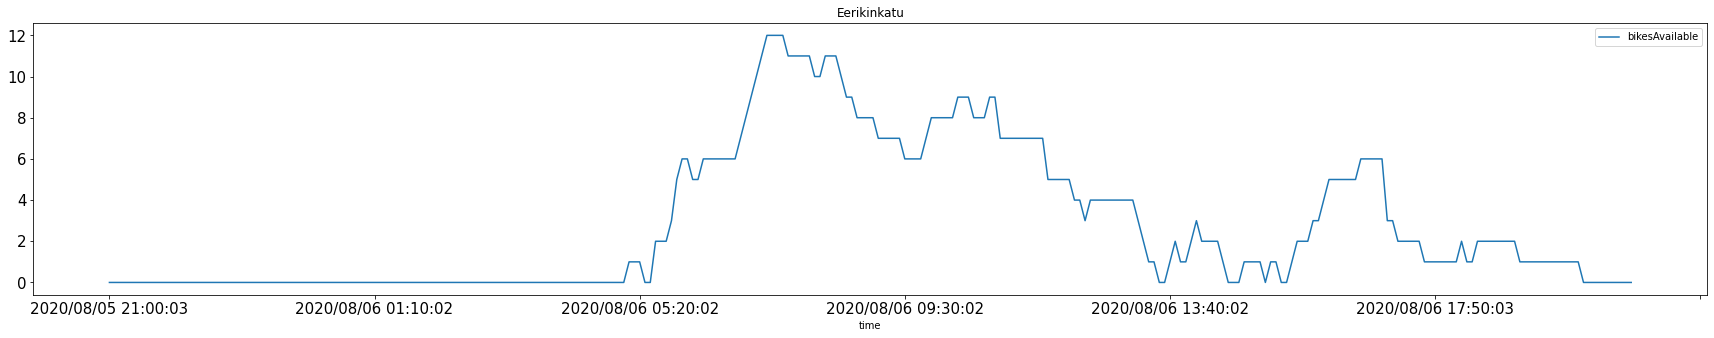

In [8]:
# plot changes per station over time X

import matplotlib.pyplot as plt

def filter_rows(yday: int, station_id: int, min_hour: int, max_hour: int) -> pd.DataFrame():
    yday = yday
    i = station_id
    station = stations[i]

    station = station[station['yday'] == yday]

    if min_hour is not None and max_hour is not None:
        station = station[(station['yhour'] >= min_hour) & (station['yhour'] <= max_hour)]

    return station


def plot_bike_changes(station_id, station):
    title = names_ids[station_id]
    station.plot(x='time', y='bikesAvailable', figsize=(30,5), fontsize=15, title=title)
    plt.savefig(f"img/{title}")

i = 27

station = filter_rows(219, i, None, None)
plot_bike_changes(i, station)


In [24]:
# Primary target: count how many times per day bikes drop to day's minimum

def count_drops(station):
    minbikes = min(station['bikesAvailable'])
    counts = 0
    was_min = False

    for i, row in station.iterrows():
        bikes = row['bikesAvailable'] 

        # drop starts
        if not was_min and bikes == minbikes:
            counts += 1
            was_min = True

        # drop ends
        elif was_min and bikes != minbikes:
            was_min = False

    return counts, minbikes

i = 113
station = filter_rows(219, i, None, None)
print(count_drops(station))
# plot_bike_changes(i, station)

(24, 2)


In [25]:
# Secondary target: Count the number of changes
# there is a change if the number of bikes is different than for the previous 5min (doesn't take into account the number of bikes changed)

def count_changes(station):
    counts = 0
    previous = -1

    for i, row in station.iterrows():
        bikes = row['bikesAvailable'] 

        # print(previous, bikes)
        if bikes != previous:
            # found change 
            counts += 1
            previous = bikes

        # print(counts)
    return counts

i = 11
station = filter_rows(218, i, None, None)
print("changes", count_changes(station))
# plot_bike_changes(i, station)

changes 124


In [11]:
changes = changes.assign(wday=changes['yday'] % 7 + 1)


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

changes

,id,bikesAvailable,spacesAvailable,allowDropoff,isFloatingBike,state,realTimeData,time,week,yday,...,Suhteellinen kosteus (%),Sateen intensiteetti (mm/h),Lumensyvyys (cm),Ilman lämpötila (degC),Kastepistelämpötila (degC),Näkyvyys (m),Tuulen suunta (deg),Puuskanopeus (m/s),Tuulen nopeus (m/s),wday
0,1215.0,0.0,10.0,1.0,0.0,Station on,1.0,2020-03-31 21:00:00,14.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1213.0,6.0,4.0,1.0,0.0,Station on,1.0,2020-03-31 21:00:00,14.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1211.0,10.0,0.0,1.0,0.0,Station on,1.0,2020-03-31 21:00:00,14.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1219.0,0.0,10.0,1.0,0.0,Station on,1.0,2020-03-31 21:00:00,14.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1217.0,18.0,2.0,1.0,0.0,Station on,1.0,2020-03-31 21:00:00,14.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-19 11:30:00,NaN,NaN,...,54.0,0.0,-1.0,23.9,13.9,34050.0,151.0,5.0,3.3,NaN
14651353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-19 11:40:00,NaN,NaN,...,55.0,0.0,-1.0,24.0,14.3,42330.0,145.0,4.7,3.1,NaN
14651354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-19 11:50:00,NaN,NaN,...,55.0,0.0,-1.0,24.0,14.5,38640.0,150.0,4.5,2.9,NaN
14651355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-19 12:00:00,NaN,NaN,...,58.0,0.0,-1.0,23.9,15.3,39720.0,154.0,4.3,2.2,NaN


In [13]:
changes.interpolate()

def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )

cyclic_spline_transformer = ColumnTransformer(
    transformers=[
        ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
        ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["wday"]),
        ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
    ],
    remainder=MinMaxScaler(),
)

In [24]:
# predict number of bikes
import sklearn
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate, TimeSeriesSplit, cross_val_score

changes['hour'] = changes['time'].dt.strftime('%H')
changes = changes.assign(wday=changes['yday'] % 7 + 1)
X = changes[["wday", "hour", "day", "month", "Ilman lämpötila (degC)", "Sateen intensiteetti (mm/h)", "Tuulen nopeus (m/s)"]]
y = changes["bikesAvailable"]

# print(len(X), len(y))

# test_size requires scikit-learn>=0.24.0
tscv = TimeSeriesSplit(n_splits = 5, gap=576, test_size=2880, max_train_size=10000)
# print(tscv)


# scores = cross_val_score(rl, X, y, cv=tscv)
# print(scores)

predictions = []

cyclic_spline_linear_pipeline = make_pipeline(
    cyclic_spline_transformer,
    HistGradientBoostingRegressor(loss='poisson'),
)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(len(X_train), len(X_test), len(y_train), len(y_test))

    model = cyclic_spline_linear_pipeline
    rl = model.fit(X_train, y_train)
    score = rl.score(X_test, y_test)
    predicted = rl.predict(X_test)

    predictions.append(predicted)

model = HistGradientBoostingRegressor(loss='poisson')
scores = cross_val_score(model, X, y, cv=tscv)
print(scores)
predictions_indexed = [pd.Series(prediction, index = y_test.index) for prediction in predictions]

10000 2880 10000 2880
10000 2880 10000 2880
10000 2880 10000 2880
10000 2880 10000 2880
10000 2880 10000 2880
[-0.14930249  0.05404047 -0.1948574   0.03983336  0.15243311]


In [25]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(model, X, y, cv=tscv)

Mean Absolute Error:     3.159 +/- 0.269
Root Mean Squared Error: 5.321 +/- 0.442


,id,bikesAvailable,spacesAvailable,allowDropoff,isFloatingBike,state,realTimeData,time,week,yday,day,month,hour,minute,yhour,year,wday
83,113,3,38,1,0,Station on,1,2020/08/02 23:40:03,32,216,3,8,2,"0,666666700",3194,2020,7
533,113,4,37,1,0,Station on,1,2020/08/02 23:45:03,32,216,3,8,2,"0,750000000",3194,2020,7
983,113,4,37,1,0,Station on,1,2020/08/02 23:50:02,32,216,3,8,2,"0,833333300",3194,2020,7
1433,113,4,37,1,0,Station on,1,2020/08/02 23:55:02,32,216,3,8,2,"0,916666700",3194,2020,7
1883,113,5,36,1,0,Station on,1,2020/08/03 00:00:03,32,216,3,8,3,"0,000000000",3195,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30369386,113,3,38,1,0,Station on,1,2020/08/02 23:15:02,32,216,3,8,2,"0,250000000",3194,2020,7
30369836,113,3,38,1,0,Station on,1,2020/08/02 23:20:02,32,216,3,8,2,"0,333333340",3194,2020,7
30370286,113,3,38,1,0,Station on,1,2020/08/02 23:25:02,32,216,3,8,2,"0,416666660",3194,2020,7
30370736,113,3,38,1,0,Station on,1,2020/08/02 23:30:02,32,216,3,8,2,"0,500000000",3194,2020,7


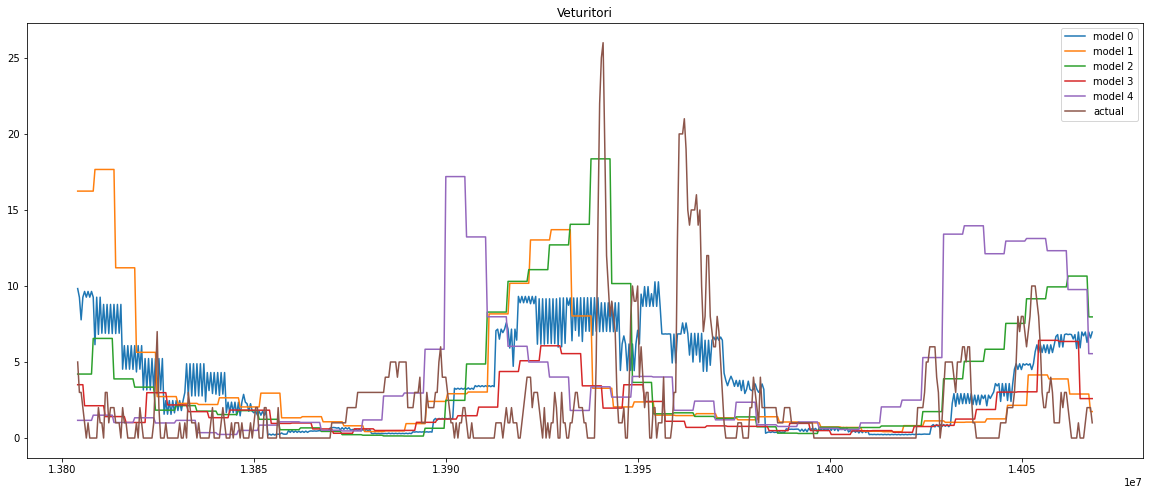

In [26]:
# plot predictions
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,8)

for i, prediction in enumerate(predictions_indexed):
    plt.plot(prediction.iloc[1000:1588], label=f"model {i}")

plt.plot(y_test[1000:1588], label="actual")
plt.legend()
plt.title(names_ids[station_i])
plt.show()